# PENNYLANE

## Bibliografía

[PennyLane CodeMap: Fundamentos de Pennylane](https://pennylane.ai/codebook/pennylane-fundamentals)

In [17]:
# INDICAR SI ESTÁS EN COLAB O NO (JUPYTER POR EJEMPLO)
colab = False # "jupyter" es False

# SI ESTÁS EN COLAB -> CAMBIAR Y PONER TU RUTA DE DRIVE HASTA LA CARPETA DE TODOS LOS ARCHIVOS
ruta_base = '/content/drive/My Drive/Quantum/PennyLane/'

In [ ]:
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    subruta = 'Imágenes pennylane/'

Mounted at /content/drive


In [ ]:
if colab:
    !pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 40.5 MB/s eta 0:00:00


In [1]:
import pennylane as qml
from pennylane import numpy as np
from IPython.display import display,Markdown,Latex,Image
import matplotlib.pyplot as plt

# 1. Introducción a PennyLane

**PennyLane** es una librería de código abierto de Python para construir y simular *algoritmos cuánticos e híbridos*. Permite correr los circuitos localmente en las CPUs, o externamente en varias GPUs, simuladores cuánticos o dispositivos cuánticos. Tiene varias funcionalidades; entre ellas, el *Quantum Machine Learning* o la *optimización cuántica*.

Para poder usar correctamente PennyLane y saber lo que estás haciendo, has de tener unos *conocimientos previos:*
- Álgebra lineal, números complejos y cálculo en varias variables.
- Programación elemental en Python: variables, listas, condicionales, bucles, numpy y funciones.
- Representación de estados cuánticos como vectores en el espacio de Hilbert.
- Medidas cuánticas, observables, regla de Born para las probabilidades, valores esperados.
- Representación de preparaciones de estados cuánticos, operaciones, y medidas como circuitos cuánticos.

## 1.1 Funciones Quantum

Función de Python donde se define un **circuito cuántico** mediante *puertas* controladas por parámetros y puestas sobre *cables/cúbits*.

- Todos los *cúbits* en un circuito *empiezan* en $|0>$.
- Las puertas tienen la *estructura*:

```
qlm.gate1(parameters, wires)
qlm.gate2(parameters)
```
- Las puertas se aplican en el *orden escritas* (y se dibujan de arriba a abajo: el qubit 0 es el de más arriba, y el $n-1$ el de más abajo).

- Siempre *al final de la función* escribir lo siguiente para conseguir el ```np.array``` que representa el *estado cuántico final:*

```
return qlm.state()
```

      
Si no escribimos esto, podemos usar la función definida como un *subcircuito* dentro de uno más grande. Por otro lado, también se pueden devolver otras cosas (ver en el apartado 2 de *Medidas*).

## 1.2 Puertas cuánticas uni-cúbit

En realidad se tratan de **matrices que actúan sobre un cúbit**. Son las responsables de la magia de los circuitos cuánticos. Éstas, junto con las puertas multi-cúbit, hacen que los cúbits evolucionen hasta llegar al resultado final.

- **Puertas** $RX(\theta), RY(\theta), RZ(\theta)$: Para *rotar el cúbit* un ángulo $\theta$ en el eje $X$, $Y$, o $Z$.

$$
RX = \begin{pmatrix} cos(\frac{\theta}{2}) & -i sen(\frac{\theta}{2}) \\ -i sen(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{pmatrix}
$$

$$
RY = \begin{pmatrix} cos(\frac{\theta}{2}) & -sen(\frac{\theta}{2}) \\ sen(\frac{\theta}{2}) & cos(\frac{\theta}{2}) \end{pmatrix}
$$

$$
RZ = \begin{pmatrix} e^{-i \frac{\theta}{2}} & 0 \\ 0 & e^{i \frac{\theta}{2}} \end{pmatrix}
$$

```
qml.RX(theta, wires = i)
qml.RY(theta, wires = i)
qml.RZ(theta, wires = i)
```
- **Puerta Hadamard** (H): Crea un estado de *superposición* $|+ \rangle$ en un cúbit

$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
$$

```
qml.Hadamard(wires = i)
```

- **Puertas de Pauli**: Son muy importantes porque cumplen muchas propiedades y nos son muy útiles:
  - $X$: Cambia el estado del cúbit de 0 a 1 o viceversa.
  - $Y$: Intercambia el estado del cúbit y además, le aplica un cambio de fase relativo
  - $Z$: Deja el estado $|0>$ como está, pero al $|1>$ le aplica un cambio de fase de $\pi$ grados

$$
X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

$$
Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}
$$

$$
Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

```
qml.PauliX(wires = i)
qml.X(wires = i)


qml.PauliY(wires = i)
qml.Y(wires = i)

qml.PauliZ(wires = i)
qml.Z(wires = i)
```
- Puerta S

$$
S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}
$$

```
qml.S(wires = i)
```

- Puerta T

$$
S = \begin{pmatrix} 1 & 0 \\ 0 & e^{i \frac{\pi}{4}} \end{pmatrix}
$$

```
qml.T(wires = i)
```

## 1.3 Puertas cuánticas multi-cúbit

- **Puerta CNOT**: Si un cúbit de *control* está en el estado $|1>$, se le aplica al *cúbit objetivo* la puerta $X$.
$$
CNOT = I \otimes X = \begin{pmatrix} I_2 & 0 \\ 0 & X \end{pmatrix}
$$

```
qml.CNOT(wires = [control, target])
```

- **Puerta CZ**: Ídem, pero con la puerta Z.
$$
CZ = I \otimes Z = \begin{pmatrix} I_2 & 0 \\ 0 & Z \end{pmatrix}
$$

```
qml.CZ(wires = [control, target])
```

- **Puerta CRZ**: Ídem, pero con la puerta $RZ$
$$
CRZ = I \otimes RZ = \begin{pmatrix} I_2 & 0 \\ 0 & RZ \end{pmatrix}
$$

```
qml.CRZ(theta, wires = [control, target])
```

- **Puerta CRY**: Ídem, pero con la puerta $RY$
$$
CRY = I \otimes RY = \begin{pmatrix} I_2 & 0 \\ 0 & RY \end{pmatrix}
$$

```
qml.CRY(theta, wires = [control, target])
```

- **Puerta CRX**: Ídem, pero con la puerta $RX$
$$
CRX = I \otimes RX = \begin{pmatrix} I_2 & 0 \\ 0 & RX \end{pmatrix}
$$

```
qml.CRX(theta, wires = [control, target])
```

- **Puerta CU**: Ídem, pero con la puerta $U$: permite aplicar una **matriz unitaria** a uno o varios cúbits objetivo, **condicionada al estado de uno o varios cúbits de control**.
$$
CU = I \otimes U = \begin{pmatrix} I_2 & 0 \\ 0 & U \end{pmatrix}
$$

```
qml.CU(U, wires = [control_1, ..., control_m, target_1, ..., target_n], control_values = [0/1, ..., 0/1])
```

$U$ debe ser una matriz unitaria (tipo `np.array`) de tamaño $2^n×2^n$, donde nn es el número de cúbits objetivo. `wires` contiene primero los cúbits de control y luego los de destino. `control_values` indica el valor ($0$ o $1$) que debe tener cada cúbit de control para que se aplique $U$.


- **Puerta SWAP**: *Intercambia* los valores de dos cúbits.
$$
SWAP = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}
$$

```
qml.SWAP(wires = [a, b])
```

- **Puerta CCNOT ó Toffoli**: Parecida lógica respecto a la puerta $CNOT$, pero ahora hay *dos cúbits de control*.
$$
CCNOT = I \otimes I \otimes X = \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \end{pmatrix}
$$

```
qml.Toffoli(wires = [control_1, control_2, target])
```

- Puerta CCZ: Ídem, pero con la puerta $Z$.
$$
CCZ = I \otimes I \otimes X = \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 \end{pmatrix}
$$

```
qml.CCZ(wires = [control_1, control_2, target])
```

- **Puerta Personalizada**: Si se desea aplicar una puerta arbitraria definida por su matriz $U$, se puede usar:

```
qml.QubitUnitary(U, wires)
```

`U` es una matriz unitaria de tamaño compatible con el número de `wires`. Aplica directamente $U$ a los cúbits indicados. No se trata de una operación controlada, simplemente se aplica la puerta $U$ sobre los qubits especificados.

- Puerta Unitaria Controlada: Permite controlar una operación arbitraria (incluso parametrizada) sin necesidad de definir su matriz explícita. Es decir, aquella que si se cumple un estado determinado en un conjunto de qubits, se aplica una puerta determinada en un cúbit objetivo. Hay que escribir la función de una forma un poco distinta, llamada *wrapper* (los argumentos del operador se escriben después de la función):

```
qml.ctrl(op, control, control_values)(argumentos_de_op)
```
Donde `op` es la puerta a aplicar al cúbit objetivo (como `qml.RX`, `qml.Hadamard`, o cualquier otra definida por el usuario)., `control` es la lista de cubits de control, `control_values` es una lista con los estados de los cubits para que se active la puerta del cúbit objetivo, y `argumentos_de_op` son los argumentos de la puerta (entre ellos, en qué cable se aplica, o un ángulo si hiciera falta).

La diferencia con `qml.CU()` es que aquí no hace falta definir explícitamente la matriz que va a actuar sobre el objetivo (basta con llamarla como una función) y acepta funciones parametrizadas, mientras que `qml.CU()` te obliga a definirla previamente como matriz y no acepta funciones parametrizadas (ej: `qml.RZ(0.5)`), sino que tienes que implementar previamente la matriz asociada.

Cuando la operación a controlar es directamente una matriz unitaria (no una función como `qml.RX`), se debe usar:


```
qml.ControlledQubitUnitary(A, control_wires, wires, control_values)
```

Donde `A` es una matriz unitaria (`np.array`) que se aplicará a los cúbits wires, `control_wires` indica los cúbits que actúan como control, y `control_values` son los valores específicos (0 o 1) que deben tener los controles para activar la operación. Esta función permite controlar matrices explícitas, con la ventaja de que se pueden separar claramente los cúbits de control y los objetivos, a diferencia de `qml.CU()`.


## 1.4 Operaciones adjuntas

Sea $U$ un *operador*. Si necesitamos $U^{\dagger}$, usamos la función ```qml.adjoint(operador)```. Podemos usarla como *función* o como *wrapper*, es decir:

```
qml.adjoint(op(argumentos_de_op))
```

```
qml.adjoint(op)(argumentos_de_op)
```

Sin embargo, si queremos hacer el adjunto de un *circuito*, tenemos que hacerlo como *wrapper*:

```
def q_function(theta, phi, omega):
  qml.RX(theta, wires = 0)
  qml.RY(phi, wires = 1)
  qml.RZ(omega, wires = 2)

qml.adjoint(q_function)(theta,phi,omega)
```

## 1.5 Dispositivo

Hay que especificar siempre en qué dispositivo va a correr el circuito. Hay muchos, pero estos tres son muy usados:

- ```default.qubit```: Para circuitos sin ruido, no está optimizado, pero el que tiene *más habilidades avanzadas*.

- ```lightning.qubit```: Dispositivo sin ruido rápido. *Optimizado* por tener backend en C++, pero su desarrollo es más lento que el anterior. *Mejor para circuitos grandes con muchos cubits*.

- ```default.mixed```: Permite puertas con ruido; trabaja con la representación de *operadores de densidad* de estados cuánticos.

En cualquier caso, se define antes de ejecutar el circuito (de n qubits) así:

```
dev = qml.device("default.qubit", wires = n)
```

Podemos definir los qubits de varias formas:

```
dev = qml.device("default.qubit", wires = n)
```

```
dev = qml.device("default.qubit", wires = range(n))
```

```
dev = qml.device("default.qubit", wires = [0, 1, ..., n-1])
```

```
dev = qml.device("default.qubit", wires = ["Nombre_0", ..., "Nombre_n-1")
```

Incluso podemos *cambiar el orden de los cubits* si queremos. Por ejemplo,
```
dev = qml.device("default.qubit", wires = [2, 0, 1])
```

El estado $|a \rangle, |b\rangle, |c\rangle$ en este caso supone que $|a\rangle$ se va al último cable (el 2), $|b\rangle$ al primero y $|c\rangle$ al del medio.

Después, para emparejar el circuito cuántico con nuestro dispositivo, tenemos dos formas.

- Forma 1: escribimos **JUSTO ENCIMA DE LA DEFINICIÓN DE NUESTRO CIRCUITO**:

```
@qml.qnode(dev)
```

Y luego ejecutamos la función de forma normal.


```
# Ejemplo

dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def my_first_quantum_function(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)

    return qml.state()

print(my_first_quantum_function(np.pi/4))
```

- Forma 2: Si queremos diferenciar la función del QNode, podemos usar la función ```qml.QNode(funcion, dev)```:

```
# Ejemplo

dev = qml.device("default.qubit", wires = 2)

def my_first_quantum_function(theta):
    qml.RX(theta, wires = 0)
    qml.PauliY(wires = 1)
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)

    return qml.state()

my_first_qnode = qml.QNode(my_first_quantum_function, dev)
print(my_first_qnode(np.pi/4))
```


## 1.6 Salida de un circuito

Será un ```np.array```. Normalmente, tendrá la estructura (suponiendo dos cubits; se puede extender a n cubits):

$$
|\psi> \ = a |00 \rangle \ + b |01\rangle  + c |10\rangle \ + d |11\rangle
$$

con $a,b,c,d \in \mathbb{C}$.


## 1.7 Dibujar circuito

Hay dos formas distintas:

La primera es una salida más 'manual', pero con los valores de los parámetros:

```
print(qml.draw(funcion_circuito)(parametros_funcion_circuito))
```

La segunda es más 'elegante', pero no salen los valores de los parámetros. Hay que llamar a la función (usando ```Matplotlib```):
```
fig, ax = qml.draw_mpl(funcion_circuito, style = "pennylane")(parametros_funcion_circuito)
fig.show()
```

**EJERCICIO 1.A**: Dado el siguiente circuito, impleméntalo en Python creando una función `circuito`. Muestra el estado final, e imprime el circuito de las dos formas.



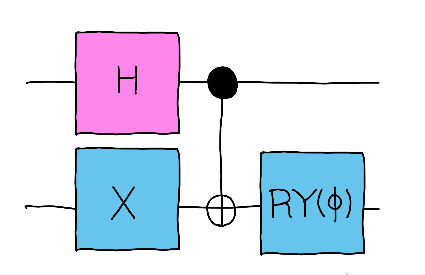

In [5]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 1a.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 1a.png'))

In [ ]:
# IMPLEMENTA TU CÓDIGO DEL EJERCICIO 1A

# RELLENAR

def circuito_1a(phi):

    # RELLENAR

    return # RELLENAR

# RELLENAR

**EJERCICIO 1.B**: Completa el código de abajo, de forma que crees dos dispositivos:

- Uno de tipo `dev.qubit`, con cables de nombre *Alice*  y *Bob*.
- Otro de tipo `dev_mixed` con dos cables genéricos.

Luego, escogiendo uno de los dos dispositivos, rellena el código poniendo los nombres de los cables correspondientes. Si quieres puedes copiar y pegar la función para hacer dos versiones según el dispositivo. Dibuja los correspondientes circuitos.

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 1B

# Dispositivos
dev_qubit = # RELLENAR
dev_mixed = # RELLENAR

# Qnode y circuito
@qml.qnode() # RELLENAR
def circuito_1b(theta):

  qml.RX(theta, wires =  ) # RELLENAR
  qml.CNOT(wires =  ) # RELLENAR

  return qml.state()

# Dibujar circuitos
# RELLENAR

**EJERCICIO 1.C**: Usando `circuito` del ejercicio 1.A, define un dispositivo de dos cables `default.qubit` para definir un QNode que aplica el circuito y devuelve el estado.

In [ ]:
# IMPLEMENTA EL EJERCICIO 1.C

## 1.8 Subcircuito

Hemos dicho antes que si dentro de una función-circuito no se devuelve ```qml.state()``` podíamos crear subcircuitos. A estos no hay que asociarles un QNode (pero al circuito principal sí). Además, podemos incluir un parámetro ```wire_list``` (aparte de otros posibles parámetros como ángulos de rotación) de forma que podemos aplicar el *mismo circuito para diferentes configuraciones de qubits*.

El esquema podría ser el siguiente:

```
def subcircuito_1(parámetros, wire_list):
  ...

...

def subcircuito_n(parámetros, wire_list):
  ...


dev = qml.device(...)
@qml.qnode(dev)
def circuito(parámetros):

    ... (invocando subcircuitos)

    return qml.state()

print(circuito(parámetros))
```

**EJERCICIO 1.D**: Dado el circuito `subcircuito_1`:

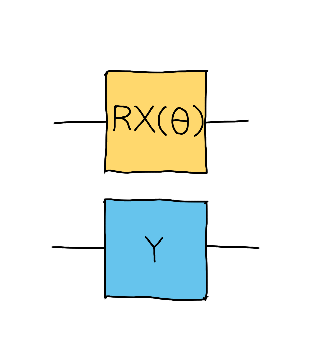

In [6]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 1d.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 1d.png'))

y el circuito `subcircuito_2`:

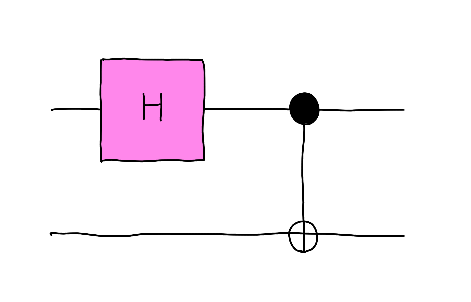

In [7]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 1d2.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 1d2.png'))

Prepara el siguiente circuito:

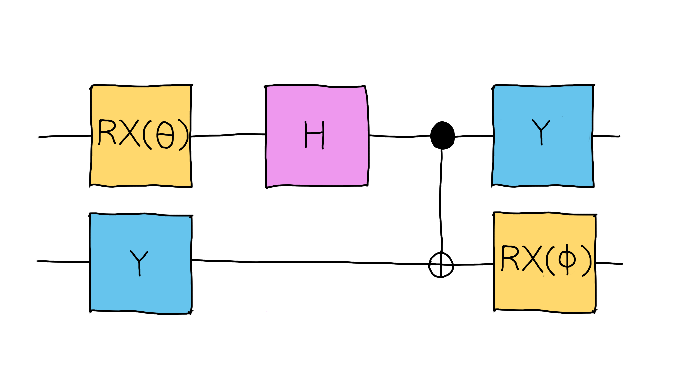

In [8]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 1d3.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 1d3.png'))

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 1.D
# RELLENAR

def subcircuito_1(theta, wire_list):

  # RELLENAR

def subcircuito_2(phi, wire_list):

  # RELLENAR

def circuito_1d(theta, phi):

  # RELLENAR

  return # RELLENAR

# RELLENAR

## 1.9 Preparación del Estado Cuántico Inicial

Por defecto es $|0\rangle$, pero si quieres definir uno en concreto, hay varias formas (todas ellas al principio de tu función-circuito):

- Forma 1: Si queremos definir *estados en general*, podemos usar ```qml.StatePrep(estado, wires, normalize = False)```. *Atención:* El vector de entrada ha de estar normalizado, o si quieres que la función te lo normalice, poner ```normalize = True```. Tener en cuenta que si hay n cables, hay $2^n$ posibles estados iniciales. Por ejemplo, si $n=3$, tenemos desde $0 = |000\rangle$ hasta $7 = |111\rangle$, por lo tanto deberíamos definir una lista de 8 números complejos de forma que el primer elemento corresponde a $|000\rangle$ y el último a $|111\rangle$.

```
# Ejemplo
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(state=None):
    qml.StatePrep(state, wires=range(int(np.log2(len(state)))))
    return qml.state()

state = circuit([1/2, 1/2, 1/2, 1/2])
```

- Forma 2: Si queremos inicializaciones en un estado definido *en binario*, podemos usar ```qml.BasisState(estado, wires)``` de la siguiente forma:

```
# Ejemplo
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(state=None):
    qml.BasisState(np.array(lista_bits), wires=range(len(lista_bits))
    return qml.state()

state = circuit([1,0,0])
```

- Forma 3: Si queremos inicializaciones en un estado definido *en números arábigos* (luego se convierten a binario), podemos usar ```qml.BasisState(estado, wires)``` de la siguiente forma:

```
# Ejemplo
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(state=None):
    qml.BasisState(np.array(lista_bits), wires=range(len(lista_bits))
    return qml.state()

state = circuit(4)
```




**EJERCICIO 1.E**: Prepara el siguiente estado:

$$
|\psi> = \alpha |001> + \beta |010> + \gamma |100>
$$
con $\alpha, \beta, \gamma \in \mathbb{C}$. No asumas que el estado está normalizado.

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 1.E
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def circuit_1e(alpha, beta, gamma):

    # RELLENAR

    return qml.state()

alpha, beta, gamma = 1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3),

print("The prepared state is", circuit_1e(alpha, beta, gamma))


**EJERCICIO 1.F**: Diseña el siguiente circuito y muéstralo por pantalla:

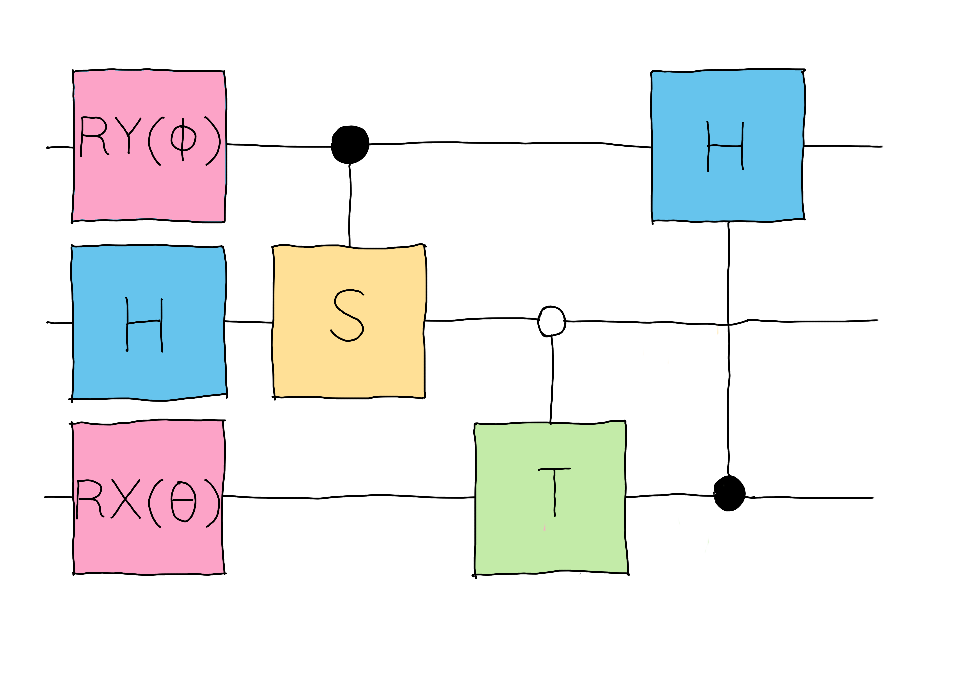

In [9]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 1f.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 1f.png'))

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 1.F

**EJERCICIO 1.G**: Dados los subcircuitos que aplican las puertas $V$ y $U$, crea el siguiente circuito y muéstralo por pantalla:

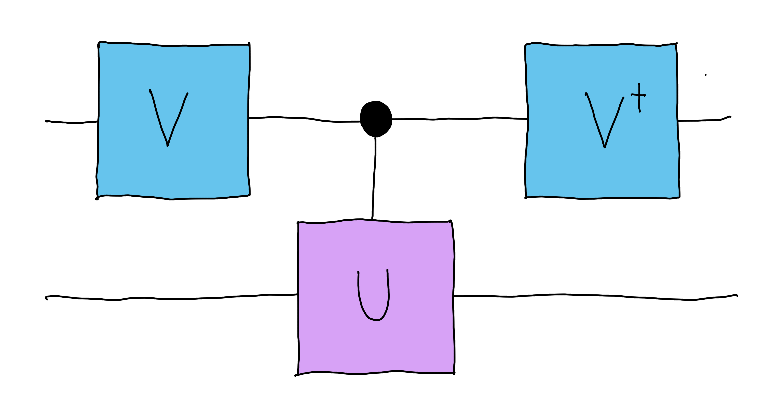

In [10]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 1g.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 1g.png'))

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 1.G

dev = qml.device("default.qubit")

def V(k):

    qml.StatePrep([1,k], wires = [0], normalize = True)

def U(theta):

    qml.IsingXX(theta, wires = [1,2])

@qml.qnode(dev)
def V_U_Vdagger(k,theta):

    # RELLENAR

    return qml.state()

k, theta = 0.5, 0.8

# RELLENAR

# 2. Medidas

Es lo que retorna una función que define un circuito. Tenemos 4 tipos. Pero antes, tenemos que definir qué es un **observable**.

Un Observable es un operador (en PennyLane además será hermítico) que representa las *posibles salidas de una medida* en un sistema cuántico. También se pueden definir operadores hermíticos mediante *operaciones entre operadores*.
- Los *eigenvalues* $\lambda_i$ del operador representan los *valores* que las salidas pueden tener.
- El *eigenvector* $|\lambda_i\rangle$ asociado al eigenvalue $\lambda_i$ representa el *estado* después de medir.

Además, la *regla de Bohr* nos dice que la **probabilidad de medir el valor $\lambda_i$ dado un estado $|\psi\rangle$** justo antes de la medida es:

$$
p(i) = |\langle\lambda_i|\psi\rangle|^2
$$

## 2.1 Sample

Muestras en español. Podemos ejecutar el circuito un número determinado de veces (se especifica en el dispositivo) y guardar los *resultados de las salidas*. Podemos tomar la medida de un *observable* o en la *base computacional* (general).

```
# Ejemplo Base Computacional
dev = qml.device("default.qubit", wires = 1, shots = 10)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires = 0)
    return qml.sample()
print(circuit())
```

En la base computacional, obtendremos *0 si se mide $|0\rangle$ y 1 si se mide $|1\rangle$*.

\\

En este ejemplo en particular, aproximadamente la mitad de las veces obtendremos 0 y la otra mitad 1, por lo que el estado tras la puerta H será:

$$
|+\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle
$$

```
# Ejemplo Observable
dev = qml.device("default.qubit", wires = 1, shots = 10)

@qml.qnode(dev)
def circuit_paulix():
    qml.Hadamard(wires = 0)
    return qml.sample(qml.PauliX(0))

print(circuit_paulix())
```

Si especificamos el observable, medimos las *posibilidades de obtener los diferentes vectores propios del observable* (con su correspondiente valor propio).

En el anterior ejemplo, como $|+\rangle$ es un vector propio de la matrix de Pauli $X$ con valor propio asociado $1$, al recibir el medidor siempre ese estado, siempre nos devolverá $1$ (su valor propio).

**EJERCICIO 2.A**: Dado el siguiente circuito:

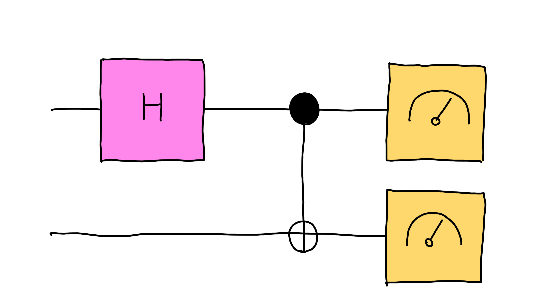

In [11]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 2a.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 2a.png'))

Obtén una única muestra de ambos cúbits en la base computacional.

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 2.A

## 2.2 Counts

Lo mismo, pero en vez de devolver una lista con los resultados, devuelve un *diccionario* con los *valores propios* como *claves* y el *número de veces* que se ha conseguido tal resultado. La función es ```qml.counts()```.

## 2.3 Probabilidades

Para obtenerlas, no es necesario especificar un número de experimentos porque se calculan analíticamente. La función es ```qml.probs()```. Devuelve un ```np.array``` tal que el *primer elemento* es la *probabilidad de devolver $|00...0\rangle$*, el *segundo $|00...01\rangle$*, el *tercero $|00...010\rangle$*,..., y el *último $|11...1\rangle$*. Se pueden obtener las probabilidades asociadas a todo el circuito o añadiendo el parámetro ```wires = []``` para obtener las *probabilidades asociadas a esos cables*.

Si realizamos una medida analítica de un *observable* (parámetro ```op```), obtenemos las *probabilidades de medir sus valores propios*.

**EJERCICIO 2.B**: En PennyLane puedes usar @ para crear el producto tensorial de observables. Te ayuda mucho cuando quieres medir varios cubits a la vez.

Para el mismo circuito de antes, construye un dispositivo de dos cubits y devuelve las probabilidades para el observable $\langle Z_0 \otimes Z_1\rangle$

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 2.B

# RELLENAR

def circuit_2b():

    qml.H(wires=0)
    qml.CNOT(wires=[0,1])

    # RELLENAR

# RELLENAR

## 2.4 Valores esperados

El que más se utiliza (en optimización y ML) porque dan *información del estado* y son *diferenciables* (no estocásticos). Se usa con operadores. Recordar que dado un operador $\hat{O}$ y un estado $|\psi\rangle$ el *valor esperado $\langle\hat{O}\rangle$* es calculado así:

$$
\langle\hat{O}\rangle = \langle\psi| \hat{O} |\psi\rangle
$$

La función es la siguiente: ```qml.expval(op(...))``` (se especifica los cables en el operador).

**EJERCICIO 2.C**: Para implementar un observable hermítico/hermitiano arbitrario usamos `qml.Hermitian()`. El valor esperado de la matriz del observable puede ser útil para saber la fidelidad entre la matriz y el estado del circuito al medir.

Nota: No se puede usar `qml.Hermitian()` con `qml.probs()`.

Implementa la función de antes, pero ahora haz que devuelva el valor esperado del operador $A = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $cuando actúa sobre el primer cúbit.

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 2.C

# RELLENAR

def circuit_2c():

    qml.H(wires=0)
    qml.CNOT(wires=[0,1])

    # RELLENAR

# RELLENAR

## 2.5 Múltiples medidas

Podemos medir varias cosas a la vez en una función que define un circuito especificándolas en el return.

# 3. Gradientes y Optimización

En muchas aplicaciones modernas de la computación cuántica, como el Quantum ML y la Química Cuántica, los circuitos cuánticos son usados como *modelos matemáticos* o *funciones*, pudiendo hacer con ellos lo que podemos hacer con las funciones.

Existen ya en ```PennyLane``` circuitos implementados como funciones (para consultar, mirar aquí: https://docs.pennylane.ai/en/stable/introduction/templates.html.

**EJERCICIO 3.A**: Completa el circuito de abajo que devuelve al final el valor esperado de $Z$ en el cable $0$ $\langle Z_0\rangle$.

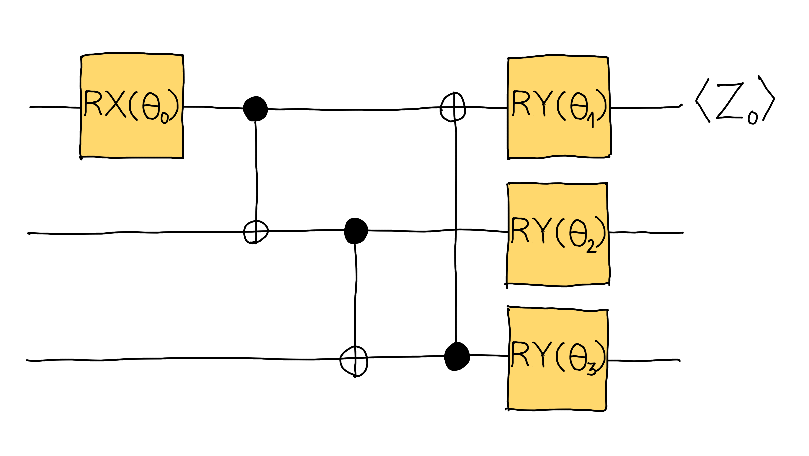

In [12]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 3a.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 3a.png'))

In [ ]:
# IMPLEMENTACIÓN DEL CÓDIGO DEL EJERCICIO 3.A

# RELLENAR

def circuit_3a(params):

    # RELLENAR

    return # RELLENAR

# RELLENAR

**EJERCICIO 3.B**: Completa el circuito haciendo uso del circuito ya implementado por PennyLane de `qml.StronglyEntanglingLayers()` para un estado inicial de cuatro cubits y que coja los parámetros necesarios para devolver el estado esperado $\langle Z_0\rangle$

Nota: invéntante los pesos iniciales que pasas a la función, pero con forma `(1, n_wires, n_parametros_por_puerta)`.

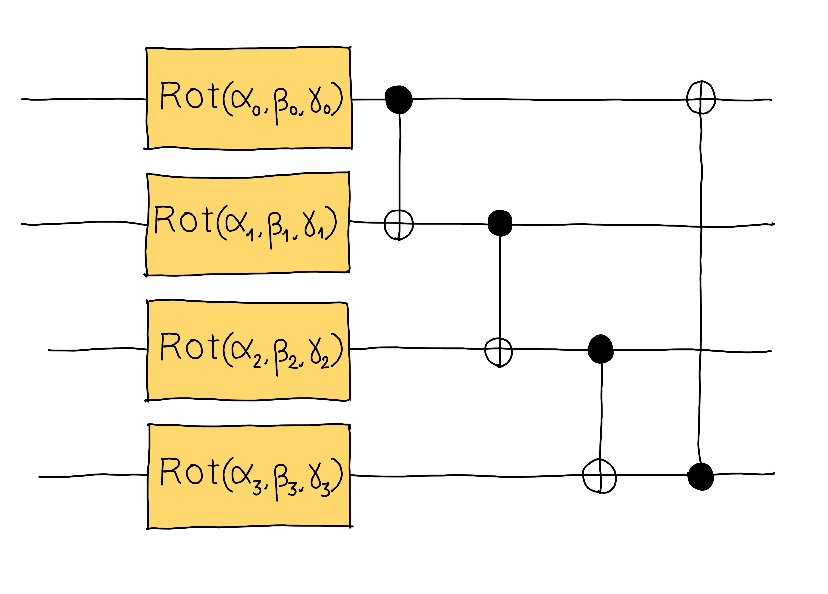

In [13]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 3b.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 3b.png'))

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 3.B

Vamos a estudiar dos casos para explicar los conceptos de **gradiente**, **jacobiano** y **hessiano**.

## 3.1 Gradiente


El primer caso es el siguiente: vamos a imaginar que nuestro circuito se puede escribir como una función $F: \mathbb{R}^n → \mathbb{R}$; es decir, recibe un vector de parámetros de entrada para las puertas $v = (\theta_0,...,\theta_{n-1})$ y devuelve un valor (por ejemplo, el valor esperado de un observable).

Dada la función $F: \mathbb{R}^n → \mathbb{R}$, definimos el **gradiente** como la derivada de la función, que es el vector:

$$
∇F = (\frac{\partial F}{\partial \theta_0},...,\frac{\partial F}{\partial \theta_{n-1}})
$$

Hay muchas formas para encontrar el gradiente de una función, pero la más famosa es las reglas de *shift-parameter* (robusta frente a errores):

$$
\frac{\partial{F}}{\partial{\theta_i}} = \frac{1}{2} \biggl[ F(\theta_i + \frac{\pi}{2}) - F(\theta_i - \frac{\pi}{2}) \biggr]
$$

Un ejemplo de su implementación sería el siguiente (```qlm.BasicEntanglerLayers``` es un circuito ya implementado por ```PennyLane```):



```
n_wires = 4
dev = qml.device("default.qubit", wires = n_wires)

@qml.qnode(dev, interface="autograd", diff_method="parameter-shift")
def entangler(weights):
    qml.BasicEntanglerLayers(weights, wires = range(n_wires))
    return qml.expval(qml.PauliZ(0))

test_weights = np.array([[0.1,0.2,0.3,0.4]], requires_grad = True)
print(qml.jacobian(entangler)(test_weights))
```

\\

Notar que para que PennyLane sepa que el argumento de la función (los *pesos*) es *diferenciable*, tenemos que especificar ```requires_grad = True``` al ```np.array``` que define los pesos. Además, tenemos que añadir dos parámetros adicionales al ```qnode``` para usar el método *parameter-shift*.

\\

También puede ocurrir que en una función queramos *diferenciar un conjunto de parámetros y no queramos hacer lo mismo con otro distinto*. Para ello, hay que definir conjuntos distintos de parámetros e incluir ``` requires_grad = True/False``` según queramos o no diferenciarlos. Además, tendremos que pasarlos como argumentos distintos a nuestro circuito.


## 3.2 Jacobiano

El segundo caso es el siguiente: si el resultado del circuito de $k$ cables son medidas de probabilidad, entonces el resultado puede ser un vector $w = (F_0,...,F_{m-1})$ con $m=2^k$ componentes. Y si el circuito depende de $n$ parámetros de entrada para las puertas $v = (\theta_0,...,\theta_{n-1})$ podemos expresar los circuitos así:

$$
F: \mathbb{R}^n → \mathbb{R}^m
$$

$$
(\theta_0,...,\theta_{n-1})→(F_0,...,F_{m-1})
$$

Entonces podemos definir el **jacobiano** de un circuito $(J[F])$ como una matriz de $m$ filas y $n$ columnas en la que

$$
J[F]_{i,j} = \frac{\partial{F_i}}{\partial{\theta_j}}
$$

por lo que la matriz es

$$
J[F] = \begin{pmatrix} \frac{\partial{F_0}}{\partial{\theta_0}} & \frac{\partial{F_0}}{\partial{\theta_1}} & \cdots & \frac{\partial{F_0}}{\partial{\theta_{n-1}}} \\ \frac{\partial{F_1}}{\partial{\theta_0}} & \frac{\partial{F_1}}{\partial{\theta_1}} & \cdots & \frac{\partial{F_1}}{\partial{\theta_{n-1}}} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial{F_{m-1}}}{\partial{\theta_0}} & \frac{\partial{F_{m-1}}}{\partial{\theta_1}} & \cdots & \frac{\partial{F_{m-1}}}{\partial{\theta_{n-1}}} \end{pmatrix}
$$

La implementación en Python es exactamente igual que antes, aunque hay que tener en cuenta que ahora el circuito no devuelve un valor, sino varios, y que el Jacobiano no es un vector, sino una matriz.

**EJERCICIO 3.C**: Dado el siguiente circuito:

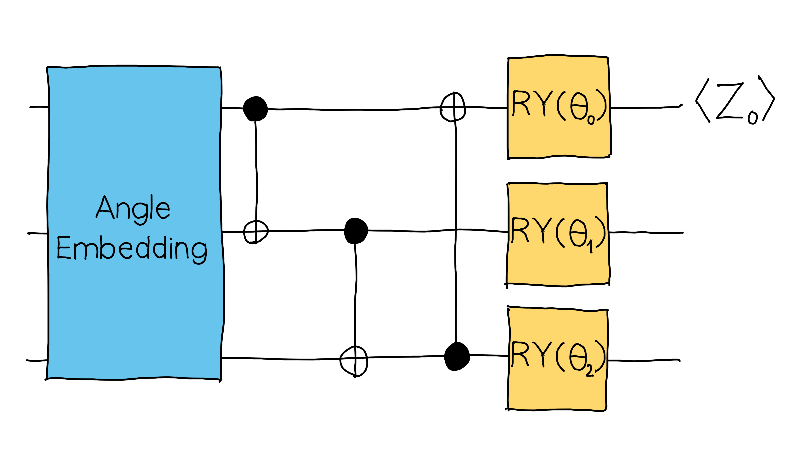

In [14]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 3c.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 3c.png'))

Donde *Angle Embedding* viene implementado por `qml.AngleEmbedding()` (necesita de tantos parámetros como cables que ocupa), impleméntalo en Python (devolviendo el valor esperado de $Z_0$) y halla el jacobiano asociado a `params`.

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 3.C

# RELLENAR

def circuit_3c(features, params):

  # RELLENAR

  return # RELLENAR

# RELLENAR

# 3.3 Hessiano

Volvamos de nuevo al primer caso, con $F: \mathbb{R}^n → \mathbb{R}$. ¿Qué pasaría si estuviésemos interesados en hallar la *segunda derivada* de nuestra función? Nos puede interesar para hallar los *puntos estacionarios* de la función, es decir, puntos donde el gradiente se vuelve cero. Estos pueden ser mínimos/máximos locales o globales, puntos silla, o puntos de inflexión.

Para hallarlos, usamos la matriz **Hessiana**, que contiene las *segundas derivadas parciales* de $F$. Es decir, el elemento $ij$ de la matriz corresponde a la derivada parcial respecto de $\theta_i$ y $\theta_j$:

$$
H[F]_{i,j} = \frac{\partial^2{F}}{\partial{\theta_i}\partial{\theta_j}}
$$

Por lo que la matriz es:

$$
H[F] = \begin{pmatrix} \frac{\partial^2{F}}{\partial{\theta_0}^2} & \frac{\partial^2{F}}{\partial{\theta_0}\partial{\theta_1}} & \cdots & \frac{\partial^2{F}}{\partial{\theta_0}\partial{\theta_{n-1}}} \\ \frac{\partial^2{F}}{\partial{\theta_1}\partial{\theta_0}} & \frac{\partial^2{F}}{\partial{\theta_1}^2} & \cdots & \frac{\partial^2{F}}{\partial{\theta_1}\partial{\theta_{n-1}}} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial^2{F}}{\partial{\theta_{n-1}}\partial{\theta_0}} & \frac{\partial^2{F}}{\partial{\theta_{n-1}}\partial{\theta_1}} & \cdots & \frac{\partial^2{F}}{\partial{\theta_{n-1}^2}} \end{pmatrix}
$$

Además, si esta matriz es *definida positiva*, es un *mínimo global*, mientras que si es *definida negativa*, es un *máximo global*. Si estudiamos sus *valores propios*, podemos saber sobre *puntos de inflexión o silla*.

También se puede definir el Hessiano de una matriz como el *Jacobiano del gradiente de F*:

$$
H[F] = J[∇F]
$$

Nos aprovecharemos de esto en PennyLane. Como el Jacobiano de un circuito también es diferenciable, podemos encontrar el Hessiano de una función $F: \mathbb{R}^n → \mathbb{R}$ al *enlazar dos Jacobianos*, tal y como se enseña en este ejemplo:

```
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev, diff_method = "parameter-shift", max_diff = 2)
def scalar_valued_circuit(params):
  qml.RX(params[0], wires = 0)
  qml.CNOT(wires=[0,1])
  qml.RY(params[1], wires = 0)
  return qml.expval(qml.PauliZ(0))

test_params = np.array([0.7,0.3], requires_grad = True)
qml.jacobian(qml.jacobian(circuit))(test_params)
```

Tenemos que establecer ```max_diff = 2``` al definir el ```qnode```.

**EJERCICIO 3.D**: Dado el siguiente circuito:

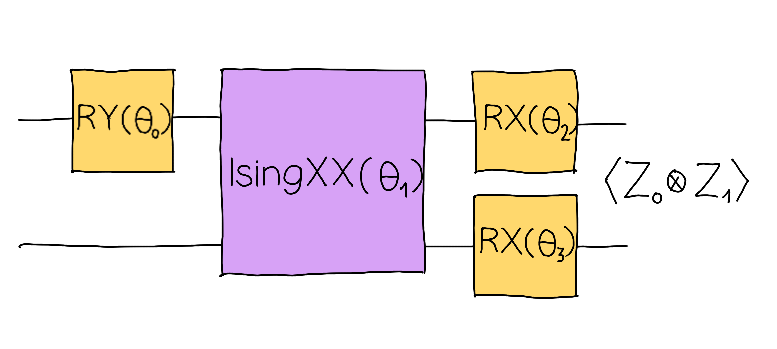

In [15]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 3d.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 3d.png'))

Implementa el circuito asociado y halla el valor del hessiano con `test_params = [0.1, 0.2, 0.3, 0.4]`. El circuito devuelve el valor esperado del producto tensorial entre $Z_0$ y $Z_1$.  

Nota: Diferencia el QNode con el método *parameter-shift* un máximo de dos veces. Usa la función `qml.IsingXX(...)`.

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 3.D

# RELLENAR

def circuit_3d(params):

  # RELLENAR

  return # RELLENAR

# RELLENAR

## 3.4 Optimización

Ahora que sabemos ya cómo interpretar circuitos como funciones y extraer sus derivadas, podemos resolver **problemas de optimización** mediante la combinación de un **circuito cuántico** y un **optimizador clásico**. Si tenemos una función de la cual queremos hallar su *mínimo valor* (por ejemplo, el menor valor esperado para $Z_0$, $<Z_0>$), podemos tratarla como una *función de coste*.


Hay muchas formas de hallar el óptimo de una función (y sus mejores parámetros); se hace mediante **optimizadores**. El más famoso es el *descenso por gradiente*, el cual tiene una función en PennyLane ```qml.GradientDescentOptimizer```, con un parámetro llamado ```stepsize```, que nos indica la longitud de los pasos que va dando por el mapa de valores.


La función de optimización **recibe** la *función/circuito a optimizar*, los *parámetros iniciales* (los cuales hay que indicarles ```requires_grad = True```) y el *número de pasos*. El **esquema a seguir** es el siguiente: se define el *optimizador*, se define el *número de pasos* totales a dar y *se dan uno a uno*. Tras el último paso, se devuelven los *mejores parámetros* y el *mínimo valor hallado*.


Un ejemplo sería el siguiente:

```
def optimize(cost_function, init_params, *steps):

    opt = qml.GradientDescentOptimizer(stepsize = 0.4)
    steps = 100
    params = init_params

    for i in range(steps):
      params = opt.step(cost_function, params)

    return params, cost_function(params)

initial_parameters = np.array([0.7,0.3], requires_grad = True)
print(optimize(scalar_valued_circuit, initial_parameters, 100))

```

**EJERCICIO 3.E**: Usando el circuito del ejercicio 3.A, sea $x$ su salida (el valor esperado $Z_0$). Sea una función de coste

$$
F(x) = x^3 - \frac{1}{2}x^2+x
$$

Define una función que reciba los parámetros del circuito `circuit_3a` y devuelva la salida de la función de coste

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 3.E

def cost_function(params):

  # RELLENAR

  return # RELLENAR

# RELLENAR

**EJERCICIO 3.F**: Define una función de optimización que halle el mínimo valor de la función de coste del ejercicio 3.E

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 3.F

# 4. Medidas intermedias

Realizar medidas intermedias en un circuito nos da mucha flexibilidad para hacer muchas cosas. Entre ellas, implementar algoritmos que dependen de resultados intermedios, permitiendo optimizar el uso de los cubits. Una área que ve beneficiada en gran medida por eso es los códigos de corrección de errores.

Sin embargo, tenemos que recordar que sólo se puede medir un cúbit con un sólo medidor intermedio...

Hemos visto que usamos ```qml.measure()``` para medir el estado de un cúbit. Además, si introducimos el parámetro ```reset = True```, el estado del cúbit se pone a cero $|0\rangle$.

## 4.1 Mantener o descartar

Podemos seleccionar un resultado de una medida intermedia, de forma que sólo el circuito sigue si se obtiene dicho resultado. Lo hacemos introduciendo el parámetro ```postselect = 0/1``` en ```qlm.measure()```.

Por ejemplo, si ```postselect = 0```, es equivalente a aplicar el proyector $|0\rangle \langle 0|$ y descartar todas las instancias donde el medidor recoge 1. Por ello, no debe sorprender si el número de resultados que se recogen en menor al número de intentos totales.

## 4.2 Operadores condicionales en un cúbit tras una medida

Puede que nos interese aplicar una puerta en el caso de que tras una medida intermedia se obtenga cierto resultado. Para ello usamos la siguiente estructura en forma de *wrapper*:

```
medida = qml.measure(...)
qml.cond(medida == 0/1, puerta)(parámetros de puerta)
```

## 4.3 Recogiendo estadísticas

Podemos incluir los resultados de las medidas en lo que devuelve la función de esta forma (podría ser también con otros objetos de medida)

```
medida = qml.measure(...)
return qml.probs(op = medida)
```

Además, se pueden modificar los resultados de medidas intermedias usando operaciones booleanas o aritméticas dentro de la operación de medida final (salvo con ```probs()```). Por ejemplo:

```
medida_0 = qml.measure(...)
medida_1 = qml.measure(...)
return qml.sample(~medida_0 - 2*medida_1)
```

Y también se pueden recoger estadísticas de la distribución conjunta de las medidas:

```
medida_0 = qml.measure(...)
medida_1 = qml.measure(...)
return qml.sample([medida_0, medida_1])
```

**EJERCICIO 4.A**: En 1993, Elitzur y Vaidman diseñaron un experimento para testar bombas potencialmente no efectivas sin detonarlas.

Se probaron en un circuito en el que se envía un fotón a través de un interferómetro de Mach-Zehnder con dos detectores de salida (C y D). La bomba se prueba justo después del primer separador de luz.

Sea una bomba real o falsa, el fotón siempre se detecta en C. Con una bomba real, cada fotón tiene un 25% de probabilidades de ser detectada en D (bomba real pero sin detonar), un 50% de explotar y un 25% de probabilidades de detectarse en C (no se sabe si es real o falsa).

Completa el siguiente circuito para modelar el comportamiento del experimento usando medidas intermedias tal que la función del circuito devuelva `counts(...)` de la distribución conjunta de todas las medidas del circuito, calculando después la probabilidad de encontrar una bomba sin detonar.

Nota: Los cristales que dividen el haz de luz (el primero y el último)... Es como si *los estados se superpusieran*... ¿Qué puerta hace eso?. Los cristales en los que rebota el haz no hacen nada. La bomba supone un medidor intermedio (ten en cuenta que sólo el experimento seguirá si se mide 0; si se mide 1 la bomba 'explota'; igual has de introducir algún parámetro especial en `measure()`). Que un receptor de fotones final reciba un fotón en D supone $|0>$, y recibirlo en C $|1>$. Y para que un intento se considere exitoso, ¿qué se tiene que medir en la bomba y en los receptores? Tienes que obtener como resultado un 25% aproximadamente.

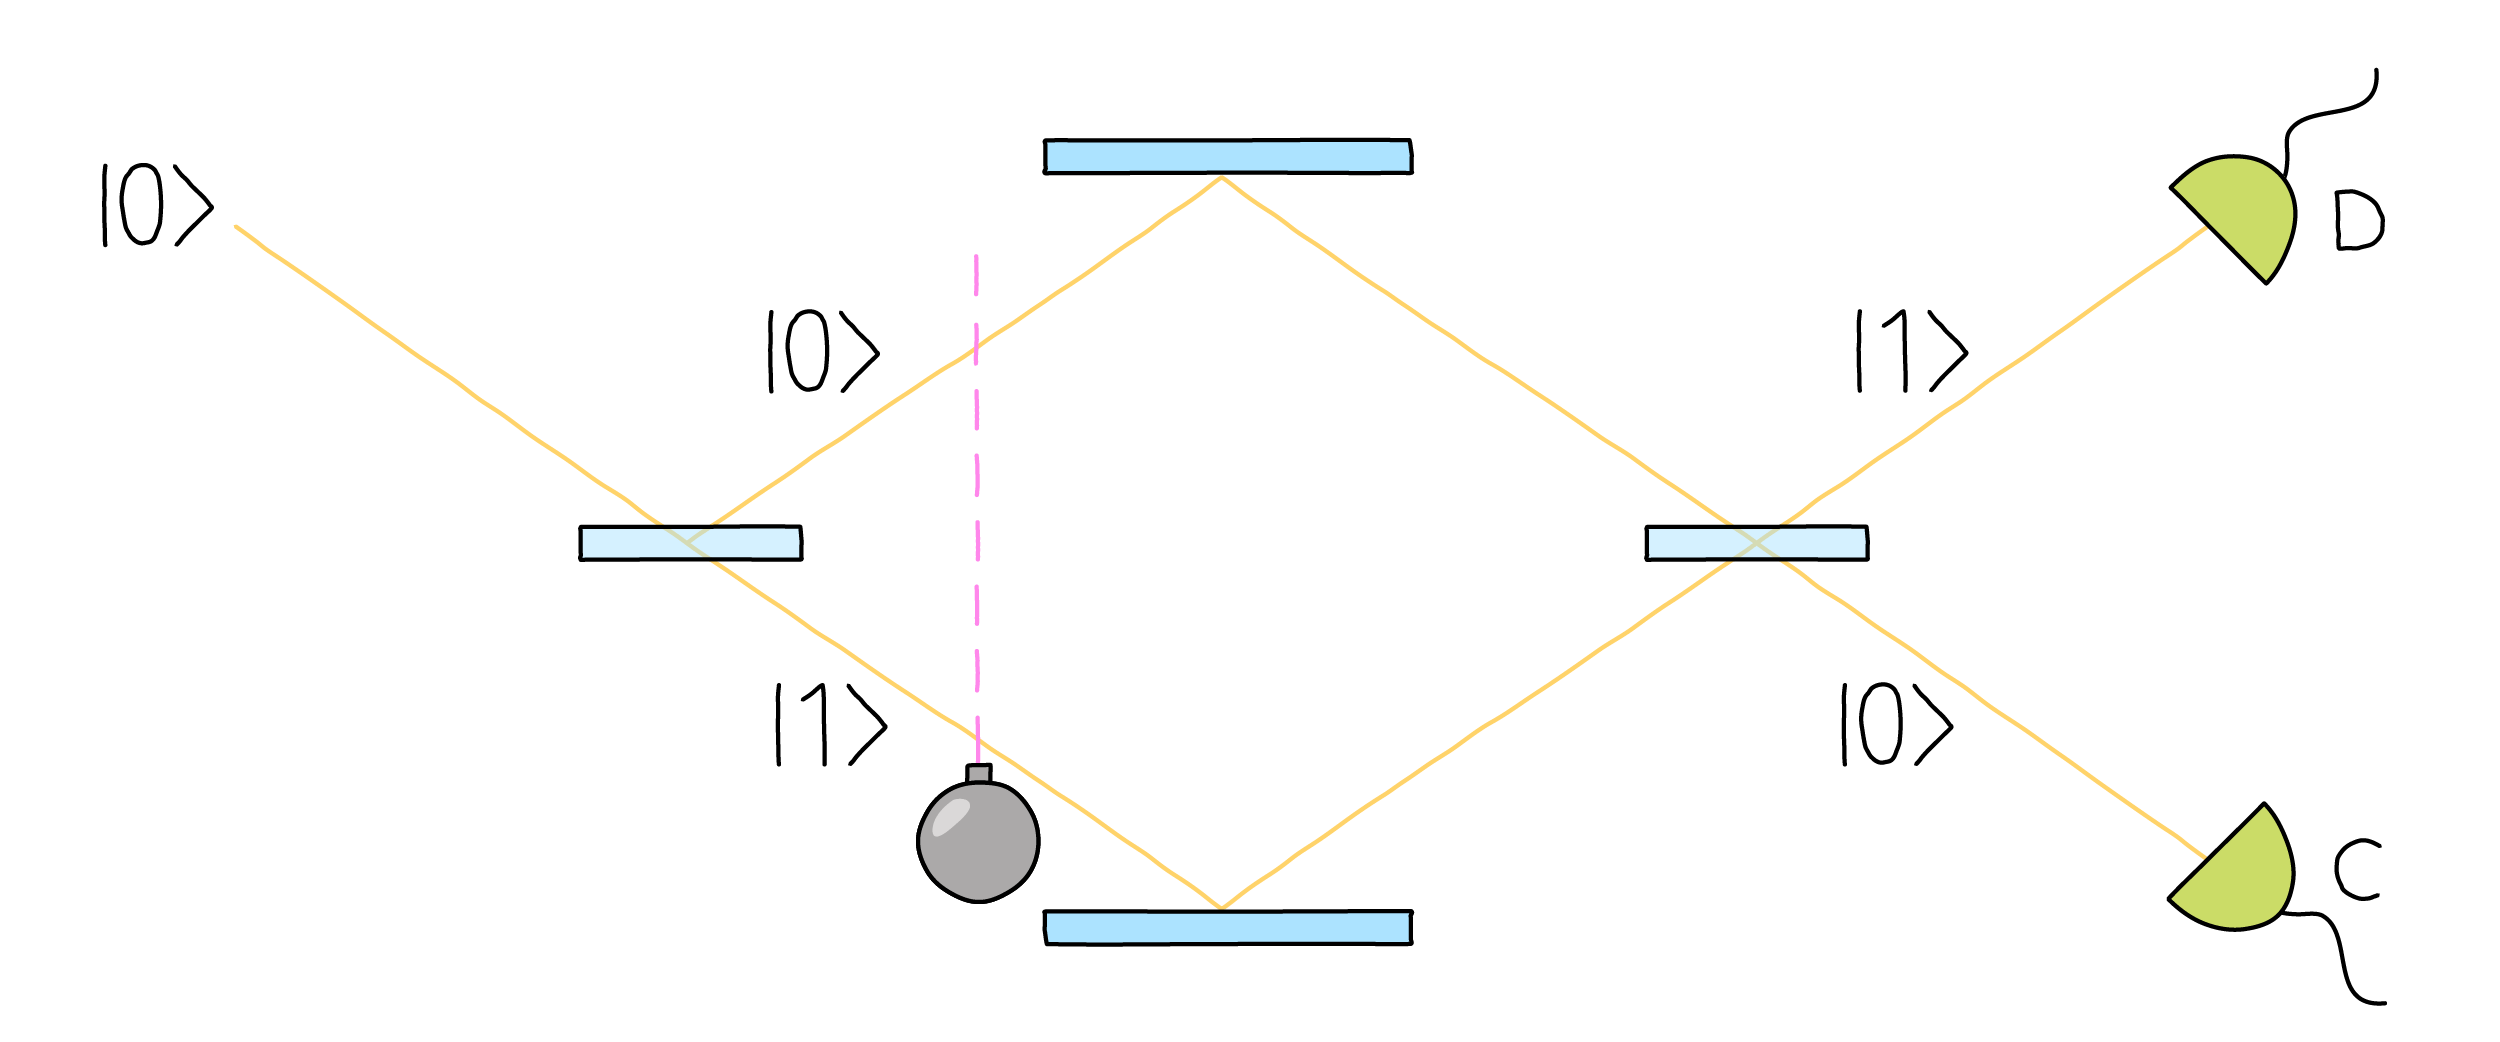

In [16]:
if colab:
    display(Image(filename = ruta_base + subruta + 'PennyLane Ejercicio 4a.png'))
else:
    display(Image(filename='./Imágenes pennylane/PennyLane Ejercicio 4a.png'))

In [ ]:
# IMPLEMENTA EL CÓDIGO DEL EJERCICIO 4.A

n_shots = 10000
dev = qml.device("default.qubit", wires = 2, shots = n_shots)

@qml.qnode(dev)
def circuit_4a():

  # RELLENAR

  return qml.counts(...)

results = circuit_4a()

prob_success = # RELLENAR: ÉXITOS/INTENTOS
print(results)

# 5. Herramientas de diseño de circuitos

Existen varias herramientas para hacer nuestros circuitos más comprensibles y robustos. Aparte de visualizarlos (epígrafe 1.7), contamos con otras tres herramientas que nos pueden ayudar.

## 5.1 Propiedades de un circuito cuántico

Dado un circuito cuántico `circuit`, podemos obtener sus propiedades (es un `dict()`) con la función `qml.specs()`. Se usa de la siguiente forma:

```
specs_func = qml.specs(circuit)
diccionario_prop = specs_func(circuit_params)
```

## 5.2 Snapshot

Nos sirve para sacar una foto del estado del circuito en un momento dado (un ket, una matriz de densidad, una matriz de covarianzas...) o el resultado de una medida arbitraria sin alterar el estado cuántico. Es un objeto de tipo `dict()`

Esto lo permiten los dispositivos ```default.qubit```, ```default.mixed``` y ```default.gaussian```. El primer argumento a ```qml.Snapshot()``` es una etiqueta para identificarlo (un string; si no se le pasa este parámetro, se le pone un número), y además si vamos a verificar una medida en particular hacemos uso del argumento ```measurement``` (si no, es equivalente a `qml.state()`). Siempre también se hace una `foto` de lo que devuelve la función.

```
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev, interface=None)
def circuit():
    qml.Snapshot(measurement=qml.expval(qml.Z(0)))
    qml.Hadamard(wires=0)
    qml.Snapshot("very_important_state")
    qml.CNOT(wires=[0, 1])
    qml.Snapshot()
    return qml.expval(qml.X(0))

  
>>> qml.snapshots(circuit)()
{0: 1.0,
'very_important_state': array([0.707+0.j, 0.+0.j, 0.707+0.j, 0.+0.j]),
2: array([0.707+0.j, 0.+0.j, 0.+0.j, 0.707+0.j]),
'execution_results': 0.0}

```

## 5.3 Debuggeo

PennyLane también incorpora su propia herramienta de debuggeo: PennyLane Debugger (PLDB). Es similar a la de Python, con comandos tales como `list` (para ver el trozo de código cercano a esa línea), `longlist`, `next` (para avanzar de línea), `continue` (hasta el siguiente punto de control) y `quit`.

Para activar el modo de debuggeo, usamos `qml.breakpoint()` dentro de nuestra función (puede invocarse varias veces si queremos parar en varios lugares). Por ahora, esta herramienta está disponible en los dispositivos `default.qubit` y `lightning.qubit`.

Al ejecutar el QNode, se ejecutará el código hasta el primer `qml.breakpoint()`, y ahí se abre una pantalla interactiva donde se pueden usar las herramientas de debuggeo. De igual forma, existen otras funciones para obtener información acerca del circuito en ese momento. Éstas son `qml.debug_expval()`, `qml.debug_probs()` y `qml.debug_state()` y `print(qml.debug_tape().draw())`

# Anexo: Soluciones a los ejercicios

[-0.27059805+0.j  0.65328148+0.j  0.65328148+0.j  0.27059805+0.j]
0: ──H─╭●───────────┤  State
1: ──X─╰X──RY(0.79)─┤  State


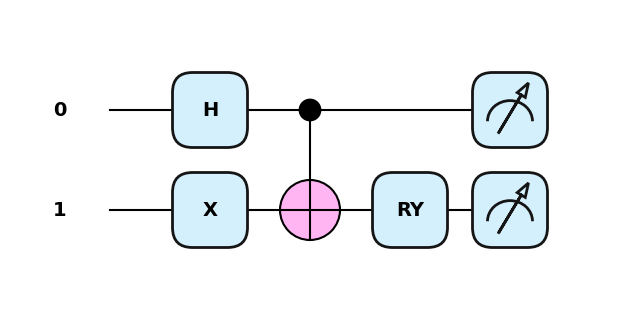

In [ ]:
# SOLUCIÓN DEL EJERCICIO 1.A

dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def circuito_1a(theta):
  qml.H(wires = 0)
  qml.X(wires = 1)
  qml.CNOT(wires = [0, 1])
  qml.RY(theta, wires = 1)
  return qml.state()

print(circuito_1a(np.pi/4))

print(qml.draw(circuito_1a)(np.pi/4))

fig, ax = qml.draw_mpl(circuito_1a, style = "pennylane")(np.pi/4)
fig.show()

Alice: ──RX(0.79)─╭●─┤  State
  Bob: ───────────╰X─┤  State
0: ──RX(0.79)─╭●─┤  State
1: ───────────╰X─┤  State


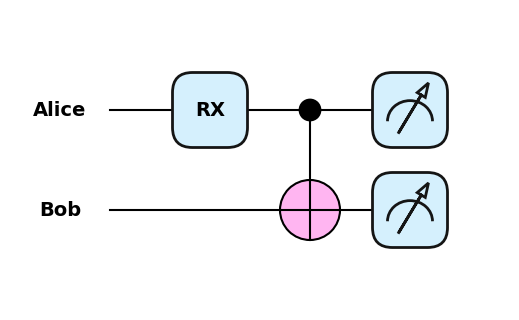

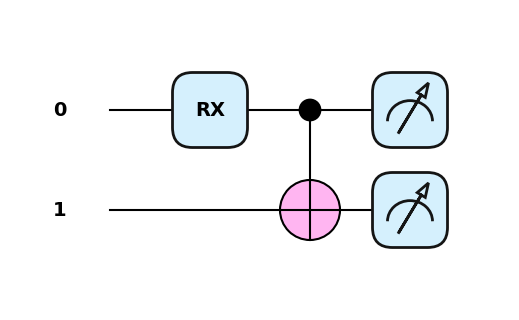

In [ ]:
# SOLUCIÓN DEL EJERCICIO 1.B

# Dispositivos
dev_qubit = qml.device("default.qubit", wires = ["Alice", "Bob"])
dev_mixed = qml.device("default.mixed", wires = 2)


# Qnode y circuito
@qml.qnode(dev_qubit)
def circuito_1b(theta):

  qml.RX(theta, wires =  "Alice")
  qml.CNOT(wires =  ["Alice", "Bob"])

  return qml.state()

# Dibujar circuitos
print(qml.draw(circuito_1b)(np.pi/4))

fig, ax = qml.draw_mpl(circuito_1b, style = "pennylane")(np.pi/4)
fig.show()

# Qnode y circuito
@qml.qnode(dev_mixed)
def circuito_1b_bis(theta):

  qml.RX(theta, wires =  0)
  qml.CNOT(wires =  [0, 1])

  return qml.state()

# Dibujar circuitos
print(qml.draw(circuito_1b_bis)(np.pi/4))

fig, ax = qml.draw_mpl(circuito_1b_bis, style = "pennylane")(np.pi/4)
fig.show()

In [ ]:
# SOLUCIÓN DEL EJERCICIO 1.C

dev = qml.device("default.qubit", wires = 2)
circuit_qnode = qml.QNode(circuito_1a, dev)
print(circuit_qnode(np.pi/4))

[-0.27059805+0.j  0.65328148+0.j  0.65328148+0.j  0.27059805+0.j]


[ 0.46193977+0.19134172j  0.19134172-0.46193977j  0.19134172+0.46193977j
 -0.46193977+0.19134172j]
0: ──RX(0.79)──H─╭●──Y────────┤  State
1: ──Y───────────╰X──RX(1.57)─┤  State


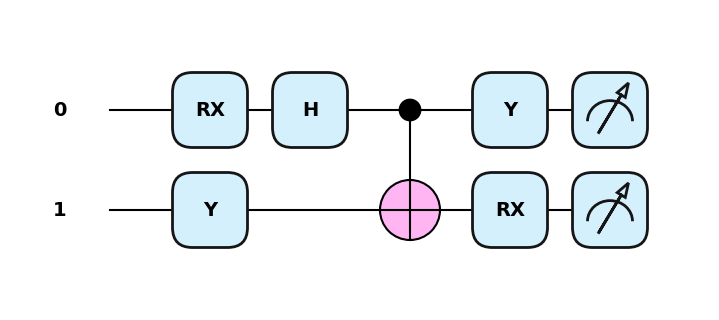

In [ ]:
# SOLUCIÓN EJERCICIO 1.D

def subcircuito_1(angle, wire_list):
    qml.RX(angle, wires = wire_list[0])
    qml.PauliY(wires = wire_list[1])

def subcircuito_2(wire_list):
    qml.Hadamard(wires = wire_list[0])
    qml.CNOT(wires = [wire_list[0], wire_list[1]])


dev = qml.device("default.qubit", wires = [0,1])

@qml.qnode(dev)
def full_circuit(theta, phi):

    subcircuito_1(theta, [0, 1])
    subcircuito_2([0, 1])
    subcircuito_1(phi, [1, 0]) # Subcircuito 1 al revés!

    return qml.state()

print(full_circuit(np.pi/4, np.pi/2))

print(qml.draw(full_circuit)(np.pi/4, np.pi/2))

fig, ax = qml.draw_mpl(full_circuit, style = "pennylane")(np.pi/4, np.pi/2)
fig.show()

In [ ]:
# SOLUCIÓN DEL EJERCICIO 1.E

dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def circuit_1e(alpha, beta, gamma):

    state = [0, alpha, beta, 0, gamma, 0, 0, 0]
    qml.StatePrep(state, wires=range(int(np.log2(len(state)))), normalize = True)

    return qml.state()

alpha, beta, gamma = 1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3),

print("The prepared state is", circuit_1e(alpha, beta, gamma))

The prepared state is [0.        +0.j 0.57735027+0.j 0.57735027+0.j 0.        +0.j
 0.57735027+0.j 0.        +0.j 0.        +0.j 0.        +0.j]


[ 0.46193977+0.j          0.32664074-0.32664074j  0.46193977+0.j
  0.13529903-0.32664074j  0.19134172+0.j          0.13529903-0.13529903j
  0.        +0.19134172j -0.13529903-0.32664074j]
0: ──RY(0.79)─╭●────╭H─┤  State
1: ──H────────╰S─╭○─│──┤  State
2: ──RX(1.57)────╰T─╰●─┤  State


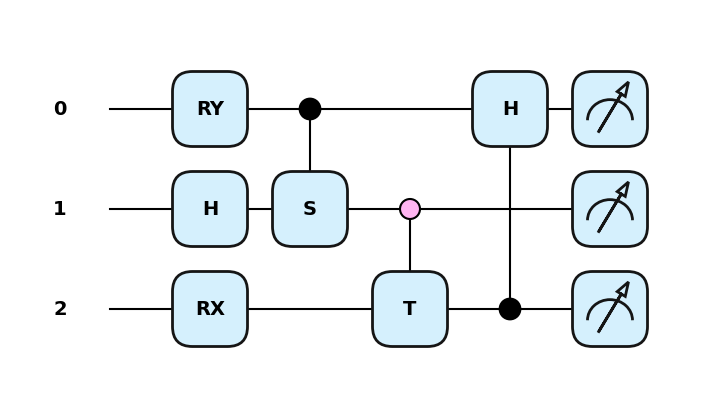

In [ ]:
# SOLUCIÓN DEL EJERCICIO 1.F

dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def circuit_1f(theta,phi):

    qml.RY(theta, wires = 0)
    qml.H(wires = 1)
    qml.RX(phi, wires = 2)
    qml.ctrl(op = qml.S, control = 0, control_values=1)(wires = 1)
    qml.ctrl(op = qml.T, control = 1, control_values=0)(wires = 2)
    qml.ctrl(op = qml.H, control = 2, control_values=1)(wires = 0)

    return qml.state()

print(circuit_1f(np.pi/4, np.pi/2))

print(qml.draw(circuit_1f)(np.pi/4, np.pi/2))

fig, ax = qml.draw_mpl(circuit_1f, style = "pennylane")(np.pi/4, np.pi/2)
fig.show()

[0.92106099+0.j         0.        +0.j         0.        +0.j
 0.        -0.38941834j 0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j        ]
0: ──|Ψ⟩────────────|Ψ⟩†─┤  State
1: ─╭IsingXX(0.80)───────┤  State
2: ─╰IsingXX(0.80)───────┤  State


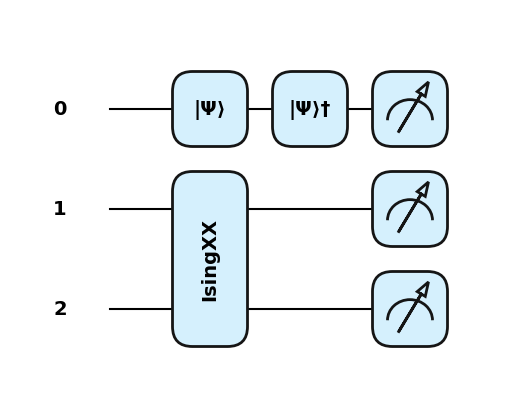

In [ ]:
# SOLUCIÓN DEL EJERCICIO 1.G

dev = qml.device("default.qubit")

def V(k):

    qml.StatePrep([1,k], wires = [0], normalize = True)

def U(theta):

    qml.IsingXX(theta, wires = [1,2])

@qml.qnode(dev)
def V_U_Vdagger(k,theta):

    V(k)
    U(theta)
    qml.adjoint(V)(k)

    return qml.state()

k, theta = 0.5, 0.8

print(V_U_Vdagger(k,theta))

print(qml.draw(V_U_Vdagger)(k,theta))

fig, ax = qml.draw_mpl(V_U_Vdagger, style = "pennylane")(k,theta)
fig.show()

In [ ]:
# SOLUCIÓN DEL EJERCICIO 2.A
dev = qml.device("default.qubit", wires = 2, shots = 1)

@qml.qnode(dev)
def circuit_2a():
    qml.H(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.sample()

print(circuit_2a())

[0 0]


In [ ]:
# SOLUCIÓN DEL EJERCICIO 2.B
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def circuit_2b():

    qml.H(wires=0)
    qml.CNOT(wires=[0,1])

    return qml.probs(op = qml.Z(wires=0)@qml.Z(wires=1))

print(circuit_2b())

[0.5 0.  0.  0.5]


In [ ]:
# SOLUCIÓN DEL EJERCICIO 2.C

dev = qml.device("default.qubit", wires = 2)

A = np.array([[1,0],[0,-1]])

@qml.qnode(dev)
def circuit_2c():

    qml.H(wires=0)
    qml.CNOT(wires=[0,1])

    return qml.expval(op = qml.Hermitian(A, wires = 0))

print(circuit_2c())

0.0


0.8755272255245213
0: ──RY(0.10)─╭IsingXX(0.20)──RX(0.30)─┤ ╭<Z@Z>
1: ───────────╰IsingXX(0.20)──RX(0.40)─┤ ╰<Z@Z>


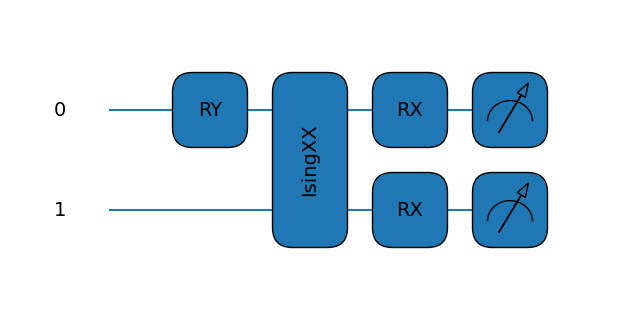

In [ ]:
# SOLUCIÓN DEL EJERCICIO 3.A
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def circuit_3a(params):

    qml.RX(params[0], wires = 0)
    qml.CNOT(wires = [0, 1])
    qml.CNOT(wires = [1, 2])
    qml.CNOT(wires = [2, 0])
    qml.RY(params[1], wires = 0)
    qml.RY(params[2], wires = 1)
    qml.RY(params[3], wires = 2)

    return qml.expval(qml.PauliZ(0))

print(circuit_3a([0.1,0.2,0.3,0.4]))

print(qml.draw(circuit_3a)([0.1,0.2,0.3,0.4]))

fig, ax = qml.draw_mpl(circuit_3a, style = "default")(np.array([0.1,0.2,0.3,0.4]))
fig.show()

-0.05101752340166421
0: ─╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ─├StronglyEntanglingLayers(M0)─┤     
2: ─├StronglyEntanglingLayers(M0)─┤     
3: ─╰StronglyEntanglingLayers(M0)─┤     

M0 = 
[[[0.79791778 0.35564618 4.19019669]
  [3.36041909 3.97000668 2.46439538]
  [3.70524168 1.13704215 5.25490688]
  [0.65494239 1.39025926 1.97373959]]]


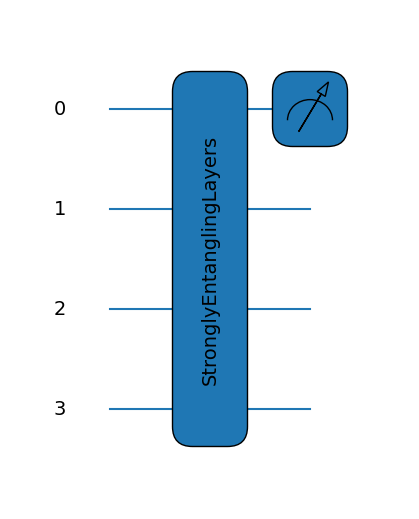

In [ ]:
# SOLUCIÓN DEL EJERCICIO 3.B

dev = qml.device("default.qubit", wires = 4)

@qml.qnode(dev)
def circuit_3b(params):

    qml.StronglyEntanglingLayers(params, wires = [0, 1, 2, 3])

    return qml.expval(qml.PauliZ(0))

# (n_layers, n_wires, 3)
test_params = np.random.uniform(low=0, high=2*np.pi, size=(1, 4, 3))
print(circuit_3b(test_params))

print(qml.draw(circuit_3b)(test_params))

fig, ax = qml.draw_mpl(circuit_3b, style = "default")(test_params)
fig.show()

In [ ]:
# SOLUCIÓN DEL EJERCICIO 3.C

dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)

def circuit_3c(features, params):

  qml.AngleEmbedding(features, wires = [0, 1, 2])
  qml.CNOT(wires = [0, 1])
  qml.CNOT(wires = [1, 2])
  qml.CNOT(wires = [2, 0])
  qml.RY(params[0], wires = 0)
  qml.RY(params[1], wires = 1)
  qml.RY(params[2], wires = 2)

  return qml.expval(qml.PauliZ(0))

features_test = np.array([0.1, 0.2, 0.3], requires_grad = False)
params_test = np.array([0.4, 0.5, 0.6], requires_grad = True)

print(qml.jacobian(circuit_3c)(features_test, params_test))

[-3.64609810e-01 -5.55111512e-17  5.55111512e-17]


In [ ]:
# SOLUCIÓN DEL EJERCICIO 3.D

dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev, diff_method = "parameter-shift", max_diff = 2)
def circuit_3d(params):
  qml.RY(params[0], wires = 0)
  qml.IsingXX(params[1], wires = [0,1])
  qml.RX(params[2], wires = 0)
  qml.RX(params[3], wires = 1)
  return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

test_params = np.array([0.1, 0.2, 0.3, 0.4], requires_grad = True)
print(qml.jacobian(circuit_3d)(test_params))

[-8.78457371e-02 -5.55111512e-17 -2.70832308e-01 -3.70166974e-01]


In [ ]:
# SOLUCIÓN DEL EJERCICIO 3.E

def cost_function(params):

  x = circuit_3a(params)
  return x**3 - 0.5*x**2 + x

initial_parameters = np.array([0.7,0.3, 0.5, 0.6], requires_grad = True)
print(cost_function(initial_parameters))

1.3709074443100557


In [ ]:
# SOLUCIÓN DEL EJERCICIO 3.F

def optimize(cost_function, init_params, steps):

  opt = qml.GradientDescentOptimizer(stepsize = 0.4)
  params = init_params

  for i in range(steps):
    params = opt.step(cost_function, params)

  return params, cost_function(params)

initial_parameters = np.array([0.7,0.3, 0.2, 0.9], requires_grad = True)
minimum = optimize(cost_function, initial_parameters, 100)

print("Parameters: ", minimum[0])
print("Min value: ", minimum[1])

Parameters:  [0.7        3.19536914 0.2        0.9       ]
Min value:  -2.492779276813316


In [ ]:
# SOLUCIÓN DEL EJERCICIO 4.A

n_shots = 10000
dev = qml.device("default.qubit", wires = 2, shots = n_shots)

@qml.qnode(dev)
def circuit_4a():

  qml.H(wires = 0)
  m_bomb = qml.measure(wires = 0, postselect = 0)
  qml.H(wires = 0)
  m_det = qml.measure(wires = 0)

  return qml.counts(op = [m_bomb, m_det])

results = circuit_4a()
print(results)
prob_success = results['00']/n_shots
print(prob_success)

{'00': np.int64(2487), '01': np.int64(2482)}
0.2487
